In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [3]:
data=pd.read_csv('Social_Network_Ads.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [9]:
le=LabelEncoder()
data['Gender']=le.fit_transform(data['Gender'])

<Axes: >

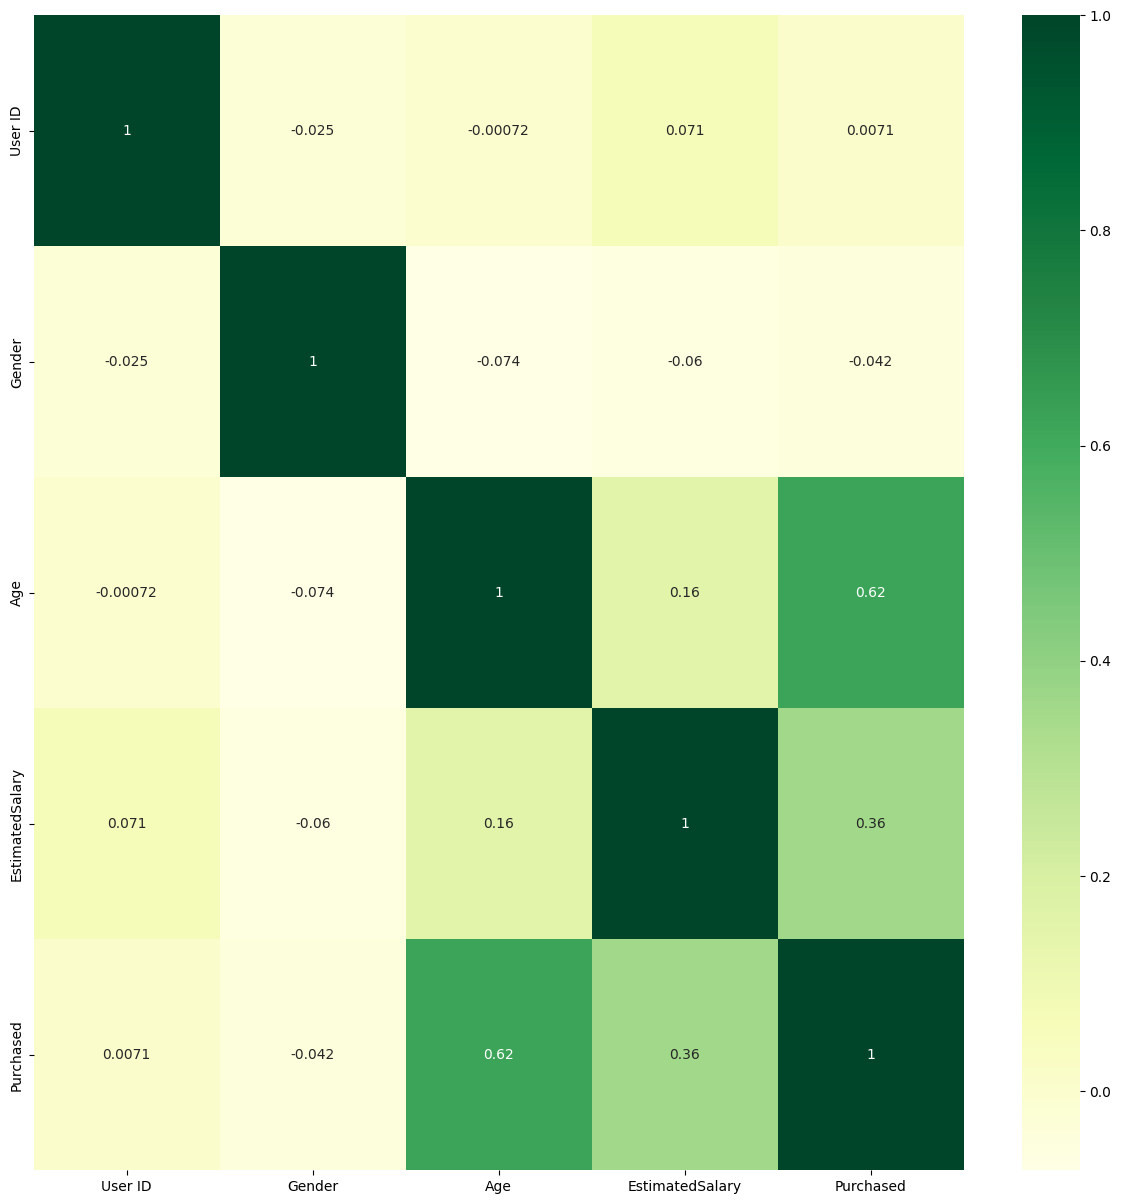

In [11]:
plt.figure(figsize=([15,15]))
sns.heatmap(data.corr(),cmap='YlGn',annot=True)

In [14]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [18]:
data=data.rename(
    columns={
        'User ID':'u_id',
        'EstimatedSalary':'e_salary'
    }
)

In [24]:
data.columns

Index(['u_id', 'Gender', 'Age', 'e_salary', 'Purchased'], dtype='object')

In [28]:
data.drop('u_id',inplace=True,axis=1)

In [30]:
data.head()

,Gender,Age,e_salary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [34]:
scaler=MinMaxScaler()
data['e_salary']=scaler.fit_transform(data[['e_salary']])
data['Age']=scaler.fit_transform(data[['Age']])

In [36]:
data.head()

,Gender,Age,e_salary,Purchased
0,1,0.023810,0.029630,0
1,1,0.404762,0.037037,0
2,0,0.190476,0.207407,0
3,0,0.214286,0.311111,0
4,1,0.023810,0.451852,0


In [38]:
X=data.drop('Purchased',axis=1)
y=data['Purchased']

In [40]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [42]:
model=LogisticRegression()

In [44]:
model.fit(X_train,y_train)

LogisticRegression()

In [46]:
y_pred=model.predict(X_test)

In [48]:
comp=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})

In [52]:
comp.head(20)

,Actual,Predicted
209,0,0
280,1,1
33,0,0
210,1,1
93,0,0
84,0,0
329,1,1
94,0,0
266,0,0
126,0,0


In [56]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

In [58]:
print(cm)

[[51  1]
 [ 9 19]]


In [80]:
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score,classification_report

In [82]:
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
accu=accuracy_score(y_test,y_pred)
repo=classification_report(y_test,y_pred)

In [84]:
cor=cm[0][0]+cm[1][1]
incorr=cm[0][1]+cm[1][0]

In [88]:
print("mse : ",mse)
print("R2 score : ",r2)
print("Accuracy : ",(cor)/(cor+incorr))
print("Accuracy : ",accu)

print(repo)


mse :  0.125
R2 score :  0.4505494505494506
Accuracy :  0.875
Accuracy :  0.875
              precision    recall  f1-score   support

           0       0.85      0.98      0.91        52
           1       0.95      0.68      0.79        28

    accuracy                           0.88        80
   macro avg       0.90      0.83      0.85        80
weighted avg       0.89      0.88      0.87        80

